torch.Size([100, 1, 28, 28]) torch.Size([100])


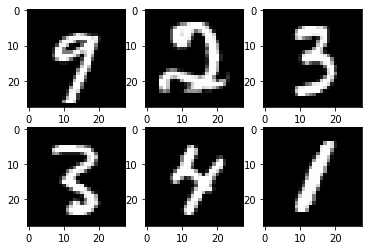

In [4]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt 

# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper parameters
input_size = 784  #28x28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST Data
train_dataset = torchvision.datasets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)
test_dataset = torchvision.datasets.MNIST(root='./data',train=False,transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

examples = iter(train_loader)
samples,labels = examples.next()
print(samples.shape,labels.shape)

for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[i][0],cmap='gray')

plt.show()


In [8]:
class NeuralNet(nn.Module):
  def __init__(self,input_size,hidden_size,num_classes):
    super(NeuralNet,self).__init__()
    self.l1 = nn.Linear(input_size,hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size,num_classes)

  def forward(self,x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)

    return out

model = NeuralNet(input_size,hidden_size,num_classes)

# Loss and Optimizer

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

# Training loop
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)
  
    # forward pass
    outputs = model(images)
    loss = criterion(outputs,labels)

    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1)%100 == 0:
      print(f'epoch = {epoch+1}/{num_epochs} , step {i+1}/{n_total_steps}, loss = {loss.item():.4f} ')

#test
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images,labels in test_loader:
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)

    outputs = model(images)
    
    # value, index is returned
    _,predictions = torch.max(outputs,1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()

  acc = 100.0 * (n_correct/n_samples)
  print(f'Accuracy = {acc:.4f}')









epoch = 1/2 , step 100/600, loss = 0.3962 
epoch = 1/2 , step 200/600, loss = 0.2568 
epoch = 1/2 , step 300/600, loss = 0.2703 
epoch = 1/2 , step 400/600, loss = 0.3213 
epoch = 1/2 , step 500/600, loss = 0.1795 
epoch = 1/2 , step 600/600, loss = 0.2031 
epoch = 2/2 , step 100/600, loss = 0.1226 
epoch = 2/2 , step 200/600, loss = 0.2593 
epoch = 2/2 , step 300/600, loss = 0.1531 
epoch = 2/2 , step 400/600, loss = 0.2262 
epoch = 2/2 , step 500/600, loss = 0.1152 
epoch = 2/2 , step 600/600, loss = 0.1994 
Accuracy = 95.1400
